In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List

df = pd.read_csv('cleaned_df')
df[df['crop_type'] == 'IC']

,Unnamed: 0.1,Unnamed: 0,experiment_id,management,crop_type,crop_season,plant_family,species,species_mix,sowing_date,...,soil_pH,previous_crop,nitrogen_residual,mean_temperature,max_temperature,heat_stress_days,total_precipitation,total_solar_radiation,mean_PET,high_humidity_days
0,0,0,Angers_fnams_2002,M3,IC,spring,cereal,barley,barley_pea,2002-03-28,...,6.0,mustard,22.0,11.349959,24.19,0,1643.07,8682.13,1.971932,548
1,1,1,Angers_fnams_2002,M3,IC,spring,legume,pea,barley_pea,2002-03-28,...,6.0,mustard,22.0,11.349959,24.19,0,1643.07,8682.13,1.971932,548
2,2,2,Angers_fnams_2003,M5,IC,spring,cereal,barley,barley_pea,2003-03-12,...,6.0,barley,71.0,11.678068,28.21,15,1451.31,9007.49,2.153154,462
3,3,3,Angers_fnams_2003,M5,IC,spring,legume,pea,barley_pea,2003-03-12,...,6.0,barley,71.0,11.678068,28.21,15,1451.31,9007.49,2.153154,462
4,4,4,Angers_fnams_2003,M6,IC,spring,cereal,barley,barley_pea,2003-03-12,...,6.0,barley,71.0,11.678068,28.21,15,1451.31,9007.49,2.153154,462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,627,627,Sanmarcoargentano_sanmarcoargentano_2004,M3,IC,spring,legume,pea,barley_pea,2004-03-15,...,7.7,durum_wheat,41.0,14.823707,29.68,105,2123.88,11463.44,2.841437,336
628,628,628,Taastrup_taastrup_2003,M3,IC,spring,cereal,barley,barley_pea,2003-04-04,...,6.6,winter_wheat,42.0,8.734178,22.40,0,1440.75,7729.00,1.592443,579
629,629,629,Taastrup_taastrup_2003,M3,IC,spring,legume,pea,barley_pea,2003-04-04,...,6.6,winter_wheat,42.0,8.734178,22.40,0,1440.75,7729.00,1.592443,579
630,630,630,Taastrup_taastrup_2003,M4,IC,spring,cereal,barley,barley_pea,2003-04-04,...,6.6,winter_wheat,42.0,8.734178,22.40,0,1440.75,7729.00,1.592443,579


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0.1                 632 non-null    int64  
 1   Unnamed: 0                   632 non-null    int64  
 2   experiment_id                632 non-null    object 
 3   management                   632 non-null    object 
 4   crop_type                    632 non-null    object 
 5   crop_season                  632 non-null    object 
 6   plant_family                 632 non-null    object 
 7   species                      632 non-null    object 
 8   species_mix                  632 non-null    object 
 9   sowing_date                  632 non-null    object 
 10  harvest_date                 632 non-null    object 
 11  biomass_seed                 632 non-null    float64
 12  plant_density                632 non-null    float64
 13  density_relative    

In [71]:
def setup_dataframe(df):
    # exclude the first two columns from the dataset (unnamed indices)
    df = df[df.columns[2:]]
    
    # standardize columns
    df.columns = df.columns.str.lower()
    
    # set dates to datetime from object
    df['sowing_date'] = pd.to_datetime(df['sowing_date'], errors='coerce')
    df['harvest_date'] = pd.to_datetime(df['harvest_date'], errors='coerce')
    
    # lower every string
    cols = df.select_dtypes(['object']).columns
    df[cols] = df[cols].apply(lambda x: x.str.lower())

    return df

df = setup_dataframe(df)

/tmp/ipykernel_7001/1668966669.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sowing_date'] = pd.to_datetime(df['sowing_date'], errors='coerce')
/tmp/ipykernel_7001/1668966669.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['harvest_date'] = pd.to_datetime(df['harvest_date'], errors='coerce')
/tmp/ipykernel_7001/1668966669.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [72]:
df.head(2)

,experiment_id,management,crop_type,crop_season,plant_family,species,species_mix,sowing_date,harvest_date,biomass_seed,...,soil_ph,previous_crop,nitrogen_residual,mean_temperature,max_temperature,heat_stress_days,total_precipitation,total_solar_radiation,mean_pet,high_humidity_days
0,angers_fnams_2002,m3,ic,spring,cereal,barley,barley_pea,2002-03-28,2002-07-08,1.3,...,6.0,mustard,22.0,11.349959,24.19,0,1643.07,8682.13,1.971932,548
1,angers_fnams_2002,m3,ic,spring,legume,pea,barley_pea,2002-03-28,2002-07-08,3.4,...,6.0,mustard,22.0,11.349959,24.19,0,1643.07,8682.13,1.971932,548


In [73]:
target: pd.Series = df['biomass_seed'] 

# Function to get correlation; pass features to get value
def get_correlation_with_target(feature):
    correlation: float = df[feature].corr(target)
    return correlation

# Get each numerical column, pass to the function above
# Create a dictionary and sort ascending=False
numerical_columns = df.select_dtypes('number').columns

correlation_table: dict = {}
for col in numerical_columns:
    correlation_table[col] = get_correlation_with_target(col)
    
correlation_series = pd.Series(correlation_table)
correlation_series = correlation_series.sort_values(ascending=False)
print(correlation_series)

biomass_seed                   1.000000
n_fertilisation_number         0.521284
n_amount_management            0.496712
n_amount                       0.496712
n_fertilisation_dose_1         0.459289
soil_silt                      0.369056
n_fertilisation_dose_2         0.359384
n_fertilisation_dose_3         0.345286
nitrogen_residual              0.301825
high_humidity_days             0.214129
interrow                       0.171792
density_relative               0.163433
density_relative_management    0.163433
irrigation_amount              0.134408
plot_lat                       0.118509
density_level                  0.078935
soil_awc                       0.056573
p_amount                       0.050378
plant_density                 -0.006099
soil_clay                     -0.044906
plot_long                     -0.126666
total_precipitation           -0.137397
max_temperature               -0.143294
total_solar_radiation         -0.153259
soil_ph                       -0.168766


Insights:
- Nitrogen presence stands out. The top features moderately correlated with the target are mostly nitrogen.
- Density Level, plant density, soil clay, and soil awc doesn't seem to be correlated at all with yield.
- Year has a slight correlation but it can be irrelevant.

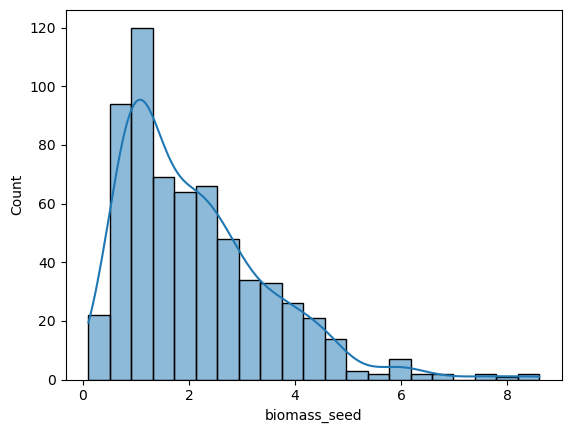

In [74]:
sns.histplot(data=df, x='biomass_seed', kde=True);

This is a right skewed distribution.

In [75]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Get the feature importance using Random Forest to capture intricate patterns(theyre good at that)
# train at numerical features only
temp_X: pd.Series = df[numerical_columns].drop('biomass_seed', axis=1)

X: np.array = temp_X.values
y: np.array = target.values

model = RandomForestRegressor()
model.fit(X, y)
feature_importances = pd.DataFrame(list(zip(temp_X.columns, model.feature_importances_)), columns=['Feature', 'Importance'])
feature_importances.sort_values(by='Importance', ascending=False).style.hide()

Feature,Importance
density_level,0.222391
n_fertilisation_number,0.163607
mean_temperature,0.128857
plant_density,0.123818
interrow,0.050615
n_amount_management,0.042449
n_amount,0.039362
soil_silt,0.037461
max_temperature,0.026647
n_fertilisation_dose_1,0.016876


Despite showing very close to no correlation at all with yield, **density level** and **plant density** are among the top 3 important features upon training with the numerical values.

Text(0.5, 1.05, 'Plant Density vs Biomass Seed (Yield) by Crop Season')

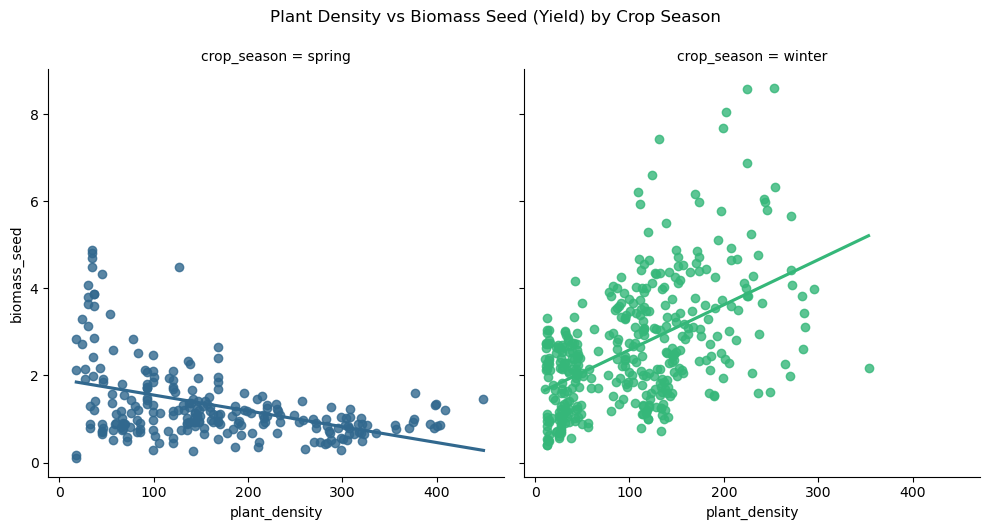

In [76]:
g = sns.lmplot(
    x='plant_density', 
    y='biomass_seed', 
    hue='crop_season', 
    col='crop_season', 
    data=df, 
    palette='viridis', 
    ci=None
)
g.fig.suptitle('Plant Density vs Biomass Seed (Yield) by Crop Season', y=1.05)

First we mine(the data), then we craft!(the model) RAAAAH. These trend are very helpful, it shows a clear correlation!

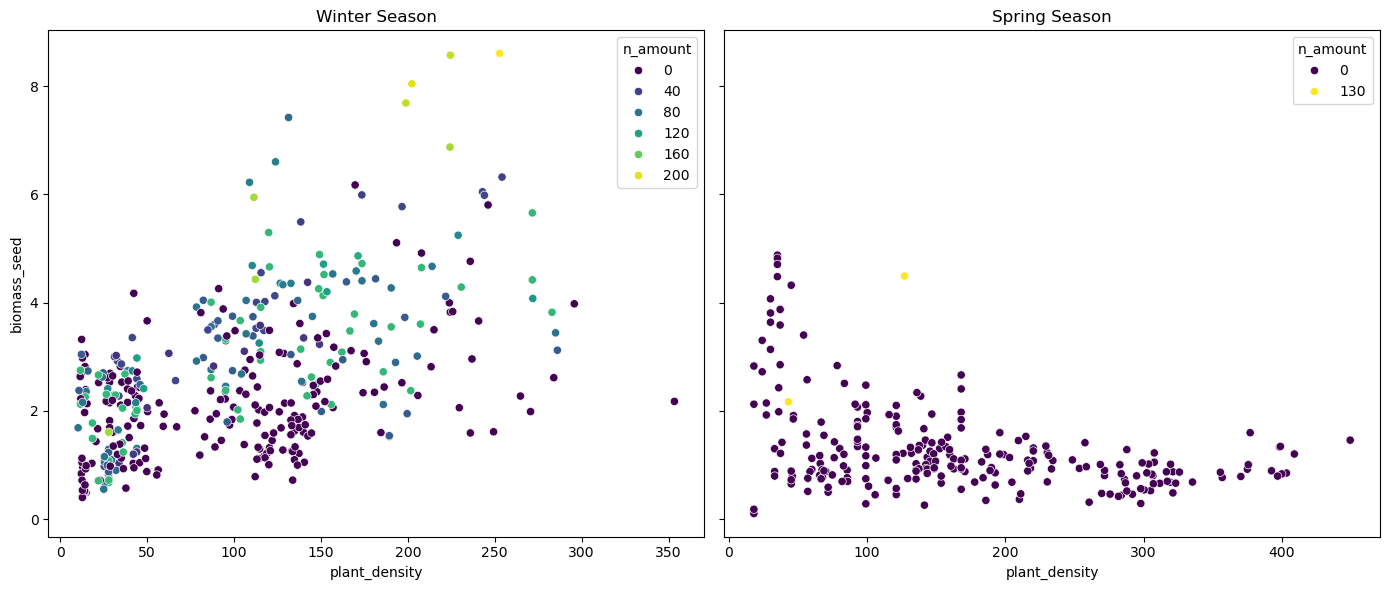

In [77]:
# I wanna take a closer look on the winter data. Let's see how nitrogen plays a factor in its upward trend
winter_df = df[df['crop_season'] == 'winter']

# On the other hand, 
spring_df = df[df['crop_season'] == 'spring']

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Winter plot
sns.scatterplot(
    ax=axes[0],
    x='plant_density', 
    y='biomass_seed', 
    hue='n_amount', 
    data=winter_df, 
    palette='viridis'
)
axes[0].set_title('Winter Season')

# Spring plot
sns.scatterplot(
    ax=axes[1],
    x='plant_density', 
    y='biomass_seed', 
    hue='n_amount', 
    data=spring_df, 
    palette='viridis'
)
axes[1].set_title('Spring Season')

plt.tight_layout()
plt.show()

Can they give more attention to those guys during spring? They don't seem to give them any nitrogen at all. Biologically, nitrogen can contribute more to biomass_seed (https://www.sciencedirect.com/science/article/pii/S2949952624000372)

Text(0.5, 1.0, 'Yield vs Plant Density during Winter with Zero(0) Nitrogen Fertilizer used')

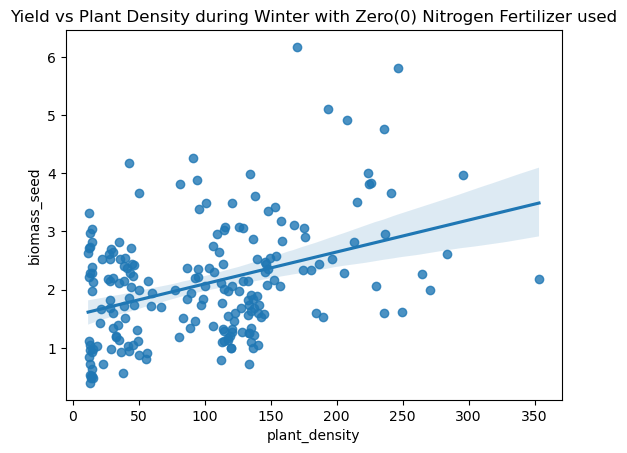

In [78]:
# Still, based on the graph above, wintern sown intercrops are still better!
winter_df_zero = winter_df[winter_df['n_amount'] == 0]
# Winter plot
sns.regplot(
    x='plant_density', 
    y='biomass_seed', 
    data=winter_df_zero, 
)
plt.title('Yield vs Plant Density during Winter with Zero(0) Nitrogen Fertilizer used')

/tmp/ipykernel_7001/2916312883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_df['nitrogen_applied'] = winter_df['n_amount'].apply(lambda x: 'no' if x == 0 else 'yes')


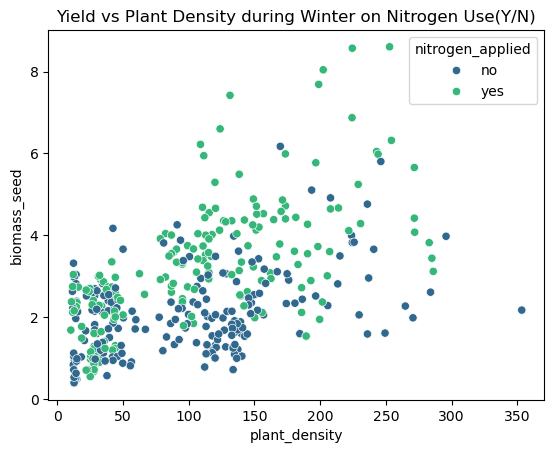

In [79]:
# since there are too many 0s, we should take a look of the yield when using nitrogen vs without?
winter_df['nitrogen_applied'] = winter_df['n_amount'].apply(lambda x: 'no' if x == 0 else 'yes')

sns.scatterplot(
    x='plant_density', 
    y='biomass_seed',
    hue='nitrogen_applied',
    data=winter_df,
    palette='viridis'
)
plt.title('Yield vs Plant Density during Winter on Nitrogen Use(Y/N)');

They seem reasonable fair, but it does look like applying nitrogen increases the chance of high yield.

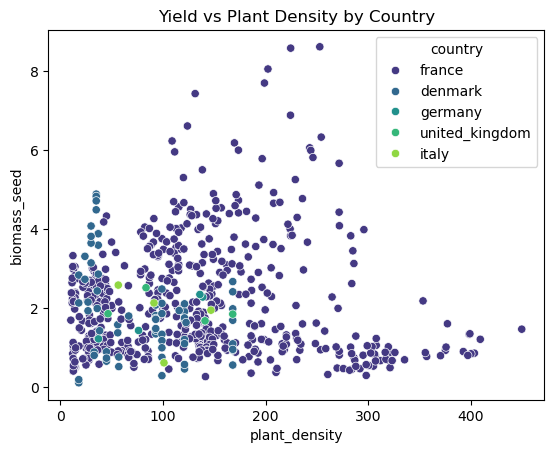

In [80]:
# What about the location? is there anything significant?
sns.scatterplot(
    x='plant_density', 
    y='biomass_seed', 
    hue='country', 
    data=df, 
    palette='viridis'
)
plt.title('Yield vs Plant Density by Country');

Most records are from France, with the lack of other country records, it is not fair to make comparisons.

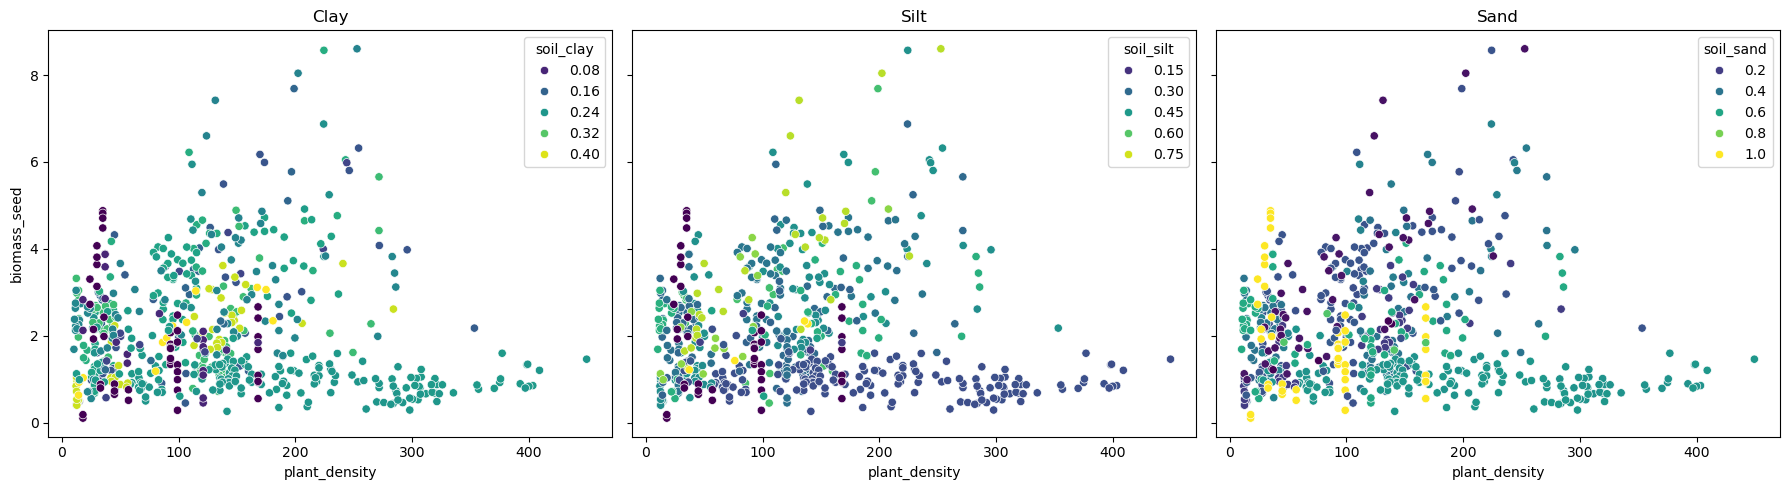

In [81]:
# Let us look at soil as well
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Clay
sns.scatterplot(
    ax=axes[0],
    x='plant_density',
    y='biomass_seed', 
    hue='soil_clay',
    data=df, 
    palette='viridis'
)
axes[0].set_title('Clay')

# Silt
sns.scatterplot(
    ax=axes[1],
    x='plant_density',
    y='biomass_seed', 
    hue='soil_silt',
    data=df, 
    palette='viridis'
)
axes[1].set_title('Silt')

# Sand
sns.scatterplot(
    ax=axes[2],
    x='plant_density',
    y='biomass_seed', 
    hue='soil_sand',
    data=df, 
    palette='viridis'
)
axes[2].set_title('Sand')

plt.tight_layout()
plt.show()

In [82]:
# I want to look into the 2nd in feature importance but there are too many 0 values. Instead, I will switch to nitrogen amounts(n_amount)
df['n_fertilisation_number'].value_counts()

n_fertilisation_number
0.0    449
1.0    112
2.0     63
3.0      8
Name: count, dtype: int64

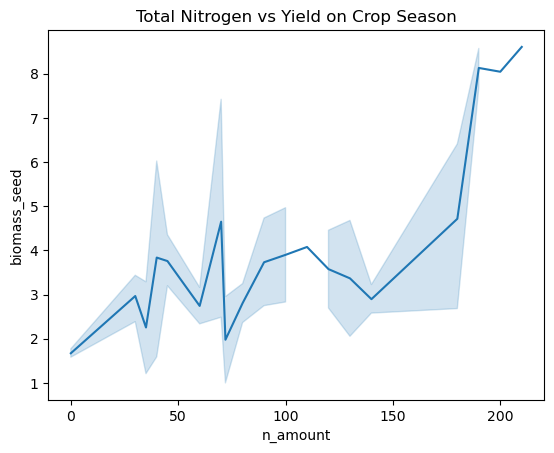

In [83]:
# graphing the relationship of yield and total nitrogen amount 
sns.lineplot(
    x='n_amount',
    y='biomass_seed', 
    data=df
)
plt.title('Total Nitrogen vs Yield on Crop Season');

We see here a very weird graph. Literally what is that?

### Looking at plant density

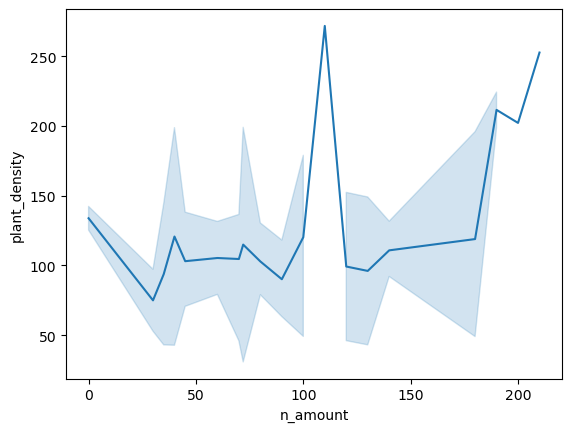

In [84]:
sns.lineplot(
    data=df,
    x="n_amount",
    y="plant_density",
)

plt.show();

Is that mf showing a middle finger

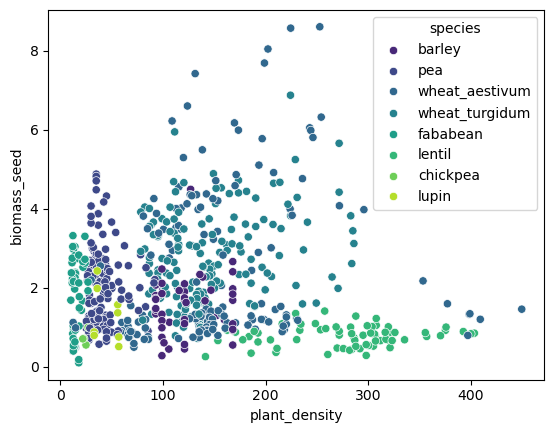

In [85]:
sns.scatterplot(
    x='plant_density', 
    y='biomass_seed', 
    hue='species', 
    data=df, 
    palette='viridis', 
);